In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [5]:
np.random.seed(42)

num_customers = 200
customer_ids = [f"CUST{i:03d}" for i in range(1, num_customers + 1)]
regions = np.random.choice(['North', 'South', 'East', 'West'], num_customers)
categories = np.random.choice(['Electronics', 'Clothing', 'Grocery', 'Furniture'], num_customers)
sales = np.random.randint(1000, 20000, num_customers)
cost = np.random.randint(500, 18000, num_customers)
quantities = np.random.randint(1, 20, num_customers)

In [6]:
df = pd.DataFrame({
    'CustomerID': customer_ids,
    'Region': regions,
    'Category': categories,
    'Sales': sales,
    'Cost': cost,
    'Quantity': quantities
})

In [7]:
df['Profit'] = df['Sales'] - df['Cost']
df['ProfitMargin'] = (df['Profit'] / df['Sales']).round(2)

df.head()

,CustomerID,Region,Category,Sales,Cost,Quantity,Profit,ProfitMargin
0,CUST001,East,Grocery,13183,15805,2,-2622,-0.20
1,CUST002,West,Furniture,13874,10317,18,3557,0.26
2,CUST003,North,Grocery,19032,11761,15,7271,0.38
3,CUST004,East,Electronics,6539,917,19,5622,0.86
4,CUST005,East,Furniture,10637,9308,2,1329,0.12


In [8]:

print("📈 Total Revenue:", df['Sales'].sum())
print("💰 Total Profit:", df['Profit'].sum())
print("📦 Average Profit Margin:", round(df['ProfitMargin'].mean(), 2))


📈 Total Revenue: 2074375
💰 Total Profit: 307176
📦 Average Profit Margin: -0.39


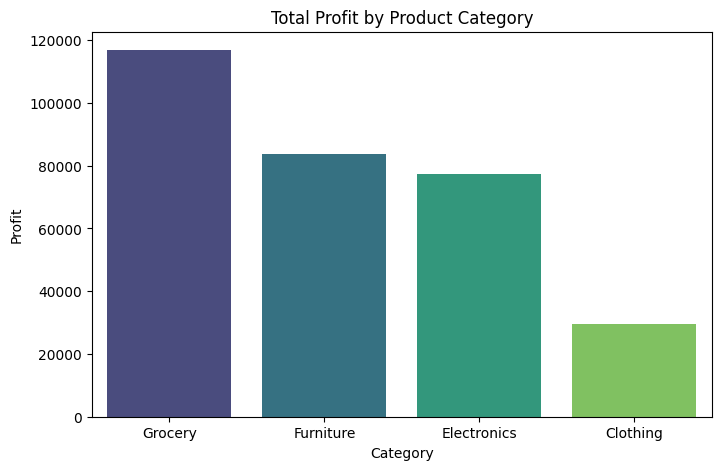

In [9]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Category', y='Profit', estimator=sum, ci=None, palette='viridis')
plt.title("Total Profit by Product Category")
plt.show()

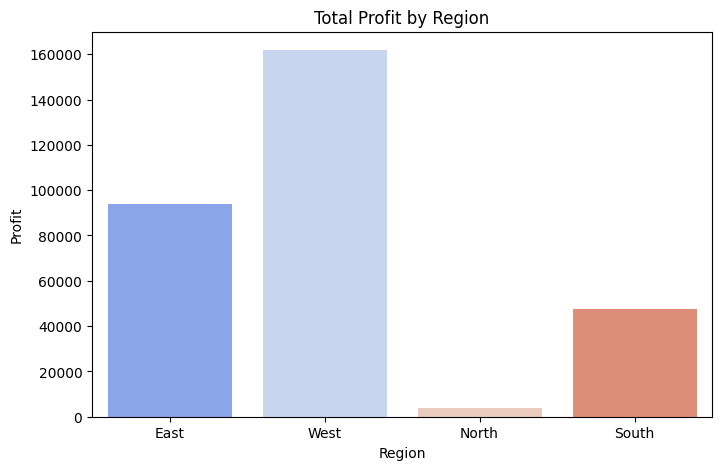

In [10]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Region', y='Profit', estimator=sum, ci=None, palette='coolwarm')
plt.title("Total Profit by Region")
plt.show()

In [11]:
top_customers = df.sort_values(by='Profit', ascending=False).head(10)
bottom_customers = df.sort_values(by='Profit', ascending=True).head(10)


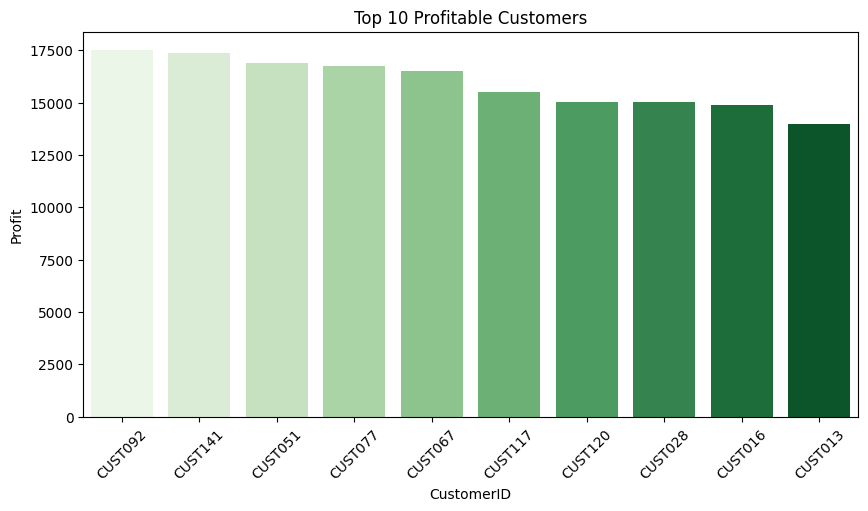

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(data=top_customers, x='CustomerID', y='Profit', palette='Greens')
plt.title("Top 10 Profitable Customers")
plt.xticks(rotation=45)
plt.show()


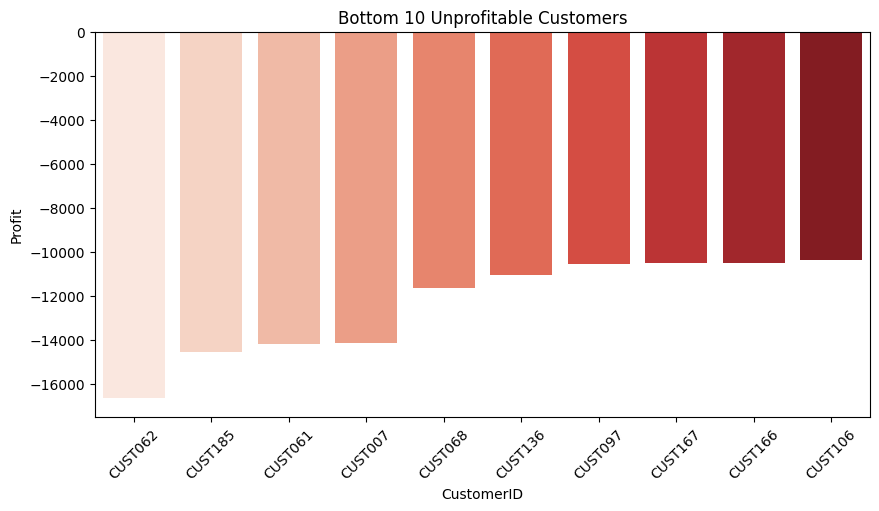

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(data=bottom_customers, x='CustomerID', y='Profit', palette='Reds')
plt.title("Bottom 10 Unprofitable Customers")
plt.xticks(rotation=45)
plt.show()

In [ ]:
features = df[['Sales', 'Profit', 'Quantity']]


kmeans = KMeans(n_clusters=4, random_state=42)
df['Segment'] = kmeans.fit_predict(features)


plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Segment', palette='viridis', s=100)
plt.title("Customer Segmentation Based on Sales & Profit")
plt.show()